# Анализ данных пассажиров Титаника


Анализ данных известного датасета Titanic. Основные этапы работы включают:

1. **Подготовка данных**: загрузка данных, объединение и приведение типов.
2. **Анализ таблицы**: исследование ключевых статистик, такие как распределение пассажиров по классу, группировка по возрасту, полу, а также расчет дополнительных показателей для выживших.
3. **Визуализация данных**: построение 10 различных графиков, для наглядного отображения ключевых зависимостей и особенностей данных. 
Дополнительно добавлена диаграмма Sankey Diagram для визуализации потоков пассажиров по нескольким категориям.

## Подготовка данных
Загрузка train и test набора данных Titanic и объединение их в один DataFrame. Установка нужных типов данных.

In [19]:
import pandas as pd

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
data = pd.concat([train_data, test_data], ignore_index=True)
data['Survived'] = data['Survived'].astype('category')
data['Pclass'] = data['Pclass'].astype('category')
data['Sex'] = data['Sex'].astype('category')

## Анализ таблицы
Визуализация базовой статистики таблицы.

In [20]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     891 non-null    category
 2   Pclass       1309 non-null   category
 3   Name         1309 non-null   object  
 4   Sex          1309 non-null   category
 5   Age          1046 non-null   float64 
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   object  
 9   Fare         1308 non-null   float64 
 10  Cabin        295 non-null    object  
 11  Embarked     1307 non-null   object  
dtypes: category(3), float64(2), int64(3), object(4)
memory usage: 96.4+ KB


,PassengerId,Age,SibSp,Parch,Fare
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,29.881138,0.498854,0.385027,33.295479
std,378.020061,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,80.000000,8.000000,9.000000,512.329200


Посмотрим, в каком классе было больше всего пассажиров:

In [21]:
data['Pclass'].value_counts()

Pclass
3    709
1    323
2    277
Name: count, dtype: int64

Распределение пассажиров показывает, что большинство людей путешествовали в третьем классе.

Сгруппируем класс и пол по среднему значению возраста:

In [22]:
age_by_class_sex = data.groupby(['Pclass', 'Sex'], observed=False)['Age'].mean()

youngest = age_by_class_sex.min()  
oldest = age_by_class_sex.max()    
difference = oldest - youngest


print(age_by_class_sex)
print("Самый юный возраст:", youngest)
print("Самый взрослый возраст:", oldest)
print("Разница в возрасте:", difference)

Pclass  Sex   
1       female    37.037594
        male      41.029272
2       female    27.499223
        male      30.815380
3       female    22.185329
        male      25.962264
Name: Age, dtype: float64
Самый юный возраст: 22.185328947368422
Самый взрослый возраст: 41.02927152317881
Разница в возрасте: 18.843942575810384


Видим, что самое маленькое среднее значение возраста у женщин в 3 классе и равно 22 годам, а самое большое у мужчин в 1  классе и равно 41 году.
Разница между ними примерно 19 лет.

Отберём только выживших пассажиров с фамилией, начинающейся на “K”:

In [23]:
survived_passengers = data[data['Survived'] == 1].copy()
survived_passengers['LastName'] = survived_passengers['Name'].apply(lambda x: x.split(',')[0])
k_passengers = survived_passengers[survived_passengers['LastName'].str.startswith('K')]

sorted_k_passengers = k_passengers.sort_values(by='Fare', ascending=False)
max_fare_passenger = sorted_k_passengers.iloc[0]
min_fare_passenger = sorted_k_passengers.iloc[-1]

print(sorted_k_passengers)
print(f"Пассажир, заплативший больше всех: {max_fare_passenger['Name']} с суммой билета {max_fare_passenger['Fare']}")
print(f"Пассажир, заплативший меньше всех: {min_fare_passenger['Name']} с суммой билета {min_fare_passenger['Fare']}")

     PassengerId Survived Pclass                                      Name  \
621          622      1.0      1              Kimball, Mr. Edwin Nelson Jr   
457          458      1.0      1         Kenyon, Mrs. Frederick R (Marion)   
316          317      1.0      2       Kantor, Mrs. Sinai (Miriam Sternin)   
184          185      1.0      3       Kink-Heilmann, Miss. Luise Gretchen   
706          707      1.0      2             Kelly, Mrs. Florence "Fannie"   
691          692      1.0      3                        Karun, Miss. Manca   
303          304      1.0      2                       Keane, Miss. Nora A   
300          301      1.0      3  Kelly, Miss. Anna Katherine "Annie Kate"   
573          574      1.0      3                         Kelly, Miss. Mary   

        Sex   Age  SibSp  Parch  Ticket     Fare Cabin Embarked       LastName  
621    male  42.0      1      0   11753  52.5542   D19        S        Kimball  
457  female   NaN      1      0   17464  51.8625   D21   

Больше всех из данных пассажиров заплатил Mr. Edwin Nelson Jr Kimball, а меньше всех Miss. Mary Kelly.

Определим максимальное количество родных, которые были с выжившим пассажиром. Для этого создадим новый столбец с общим числом родственников для каждого пассажира:

In [24]:
data['Relatives'] = data['SibSp'] + data['Parch']
survived_passengers = data[data['Survived'] == 1]
max_relatives = survived_passengers['Relatives'].max()

print(max_relatives)

6


Получили, что максимальное количество родных с выжившим пассажиром было 6.

Посчитаем среднюю стоимость билета пассажиров, для которых указана каюта и для тех, у кого она не указана, и сравним, во сколько раз они отличаются:

In [25]:
with_cabin = data[data['Cabin'].notna()]
without_cabin = data[data['Cabin'].isna()]

avg_with_cabin = with_cabin['Fare'].mean()
avg_without_cabin = without_cabin['Fare'].mean()

fare_diff = avg_with_cabin / avg_without_cabin

print(f"Пассажир с каютой: {avg_with_cabin:.2f}")
print(f"Пассажир без каюты: {avg_without_cabin:.2f}")
print(f"С каютой выше в {fare_diff:.2f}")

Пассажир с каютой: 81.93
Пассажир без каюты: 19.13
С каютой выше в 4.28


Получили, что средняя стоимость билета для пассажиров с каютой равна 81.93, а для пассажиров без каюты - 19.13. Средняя стоимость с каютой выше в 4.28 раз.

## Визуализация

Для визуализации данных построим графики по данным таблицы.

### Линейный график (Linear plot)

Этот график показывает распределение количества пассажиров по возрасту, разделённое на два пола (мужчины и женщины).

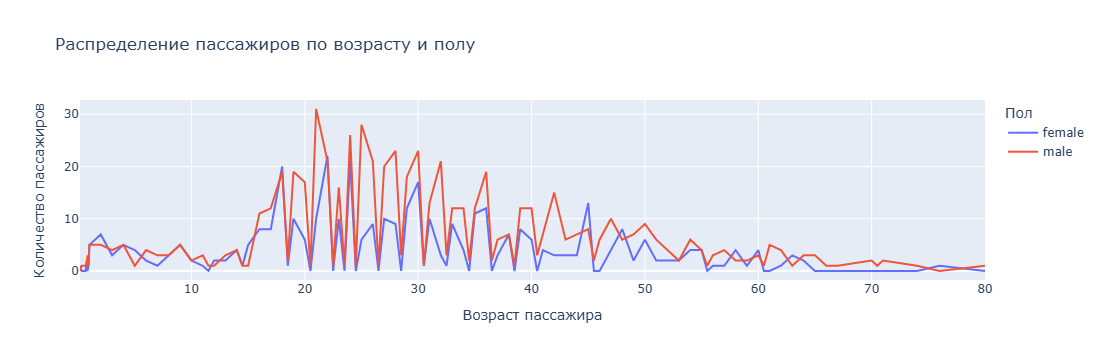

In [26]:
import plotly.express as px

age_gender_distribution = data.groupby(['Age', 'Sex'], observed=False).size().reset_index(name='Count')

fig = px.line(
    age_gender_distribution,
    x="Age", 
    y="Count", 
    color="Sex", 
    title="Распределение пассажиров по возрасту и полу",
    labels={
        "Age": "Возраст пассажира",
        "Count": "Количество пассажиров",
        "Sex": "Пол"
    }
)

fig.show()

### Диаграмма рассеяния (Scatter Plot)

На этом графике отображается зависимость между возрастом пассажиров и стоимостью их билета. Каждый маркер на графике представляет одного пассажира. 
Для того чтобы лучше понять, как класс пассажира влияет на стоимость билета, точки на графике окрашены в зависимости от класса пассажира. Это позволяет увидеть, как различаются цены на билеты для разных классов в зависимости от возраста.

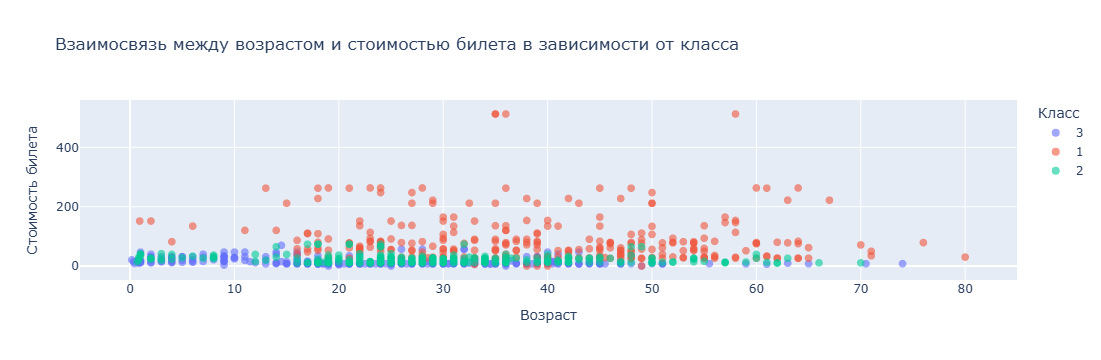

In [27]:
data_cleaned = data.copy()
data_cleaned = data_cleaned.dropna(subset=["Age", "Fare"])

fig = px.scatter(
    data_cleaned,
    x="Age", 
    y="Fare", 
    color="Pclass",
    title="Взаимосвязь между возрастом и стоимостью билета в зависимости от класса",
    labels={
        "Age": "Возраст пассажира",
        "Fare": "Стоимость билета",
        "Pclass": "Класс"
    },
    hover_data=["Name", "Sex"]
)

fig.update_traces(marker=dict(size=8, opacity=0.6), selector=dict(mode='markers'))
fig.update_layout(legend_title_text='Класс', xaxis_title="Возраст", yaxis_title="Стоимость билета")

fig.show()

### Гистограмма (Histogram)

График показывает распределение возрастов среди выживших пассажиров. Можно оценить, какие возрастные группы преобладают среди спасшихся. 

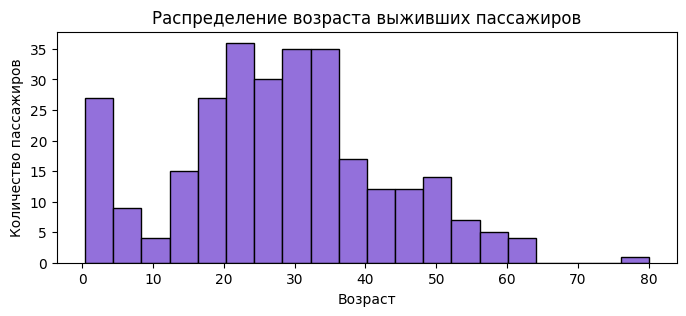

In [28]:
import matplotlib.pyplot as plt

survived_passengers = data[data['Survived'] == 1]

plt.figure(figsize=(8, 3))
plt.hist(survived_passengers['Age'].dropna(), bins=20, color='mediumpurple', edgecolor='black')

plt.title('Распределение возраста выживших пассажиров', fontsize=12)
plt.xlabel('Возраст', fontsize=10)
plt.ylabel('Количество пассажиров', fontsize=10)

plt.show()

### Горизонтальная столбчатая диаграмма (Horizontal bar chart)

Два графика показывают распределение количества виживших и невыживших пассажиров по размеру семьи. Это позволяет наглядно сравнить количество выживших и погибших в зависимости от числа родственников у пассажиров.

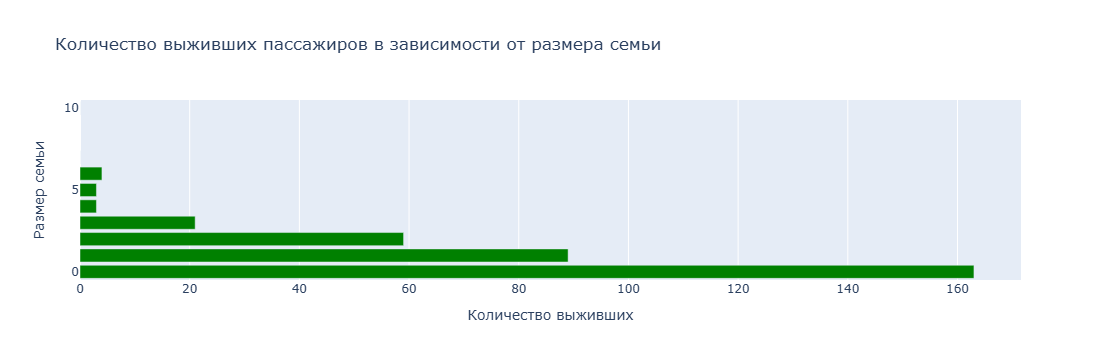

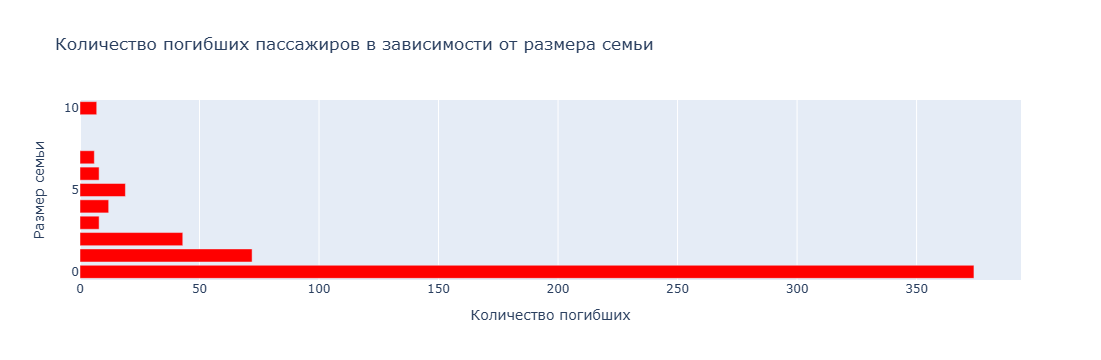

In [29]:
data['Relatives'] = data['SibSp'] + data['Parch']
survival_by_family_size = data.groupby(['Relatives', 'Survived'], observed=False).size().reset_index(name='Count')

survival_survived = survival_by_family_size[survival_by_family_size['Survived'] == 1]
survival_not_survived = survival_by_family_size[survival_by_family_size['Survived'] == 0]

fig1 = px.bar(
    survival_survived,
    x='Count',
    y='Relatives',
    orientation='h',
    title="Количество выживших пассажиров в зависимости от размера семьи",
    labels={"Count": "Количество выживших", "Relatives": "Размер семьи"},
    color_discrete_sequence=['green']
)

fig1.update_layout(
    xaxis_title="Количество выживших",
    yaxis_title="Размер семьи",
    barmode='group'
)

fig1.show()

fig2 = px.bar(
    survival_not_survived,
    x='Count',
    y='Relatives',
    orientation='h',
    title="Количество погибших пассажиров в зависимости от размера семьи",
    labels={"Count": "Количество погибших", "Relatives": "Размер семьи"},
    color_discrete_sequence=['red']
)

fig2.update_layout(
    xaxis_title="Количество погибших",
    yaxis_title="Размер семьи",
    barmode='group'
)

fig2.show()

### Столбчатая диаграмма (Bar Chart)

График показывает, сколько мужчин и женщин сели на борт в каждом из портов (C - Cherbourg, Q - Queenstown, S - Southampton).

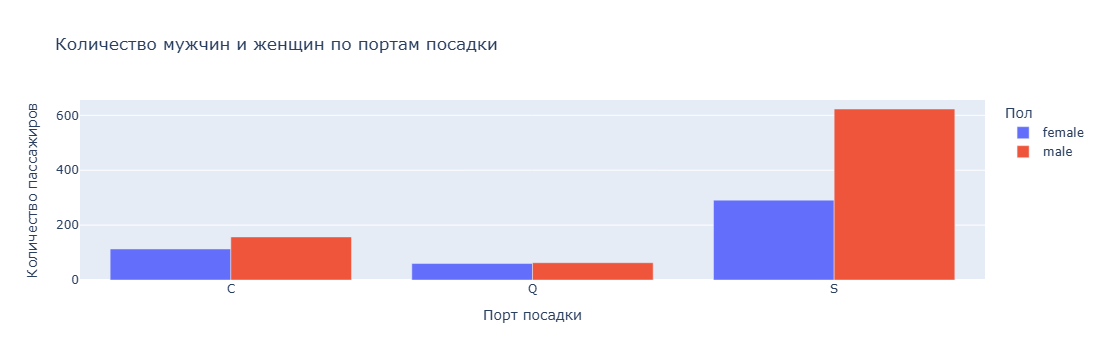

In [30]:
data_grouped = data.groupby(['Embarked', 'Sex'], observed=False).size().reset_index(name='count')

fig = px.bar(
    data_grouped,
    x="Embarked", 
    y="count",
    color="Sex",
    title="Количество мужчин и женщин по портам посадки",
    labels={
        "Embarked": "Порт посадки",
        "count": "Количество пассажиров",
        "Sex": "Пол"
    },
    barmode="group"
)

fig.show()

### Круговая диаграмма (Pie Chart)

Каждый график представляет один порт посадки (C - Cherbourg, Q - Queenstown, S - Southampton) и показывает долю выживших и погибших пассажиров, севших в этом порту. 

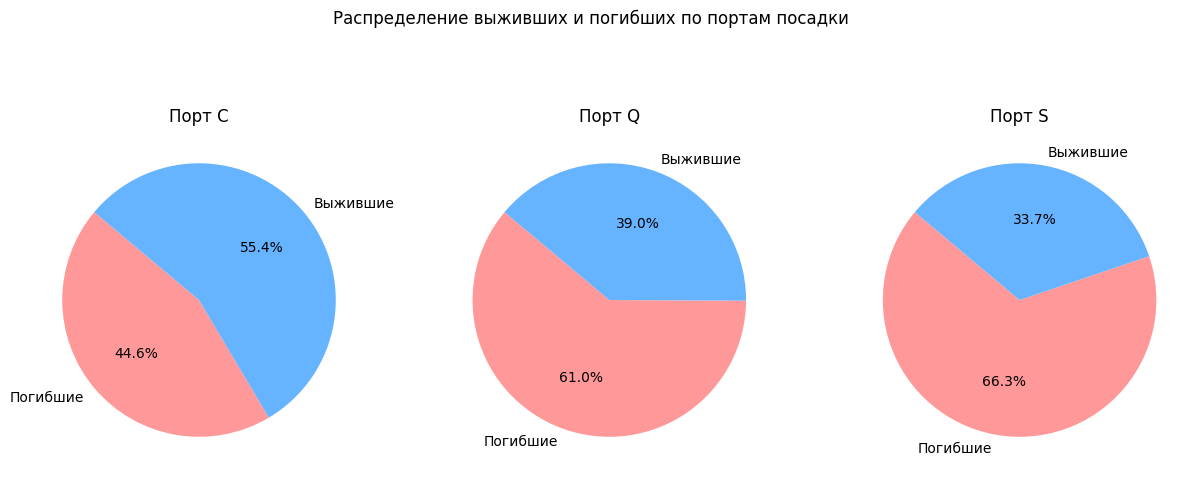

In [31]:
data_grouped = data.groupby(['Embarked', 'Survived'], observed=False).size().reset_index(name='count')
ports = data_grouped['Embarked'].unique()

fig, axes = plt.subplots(1, len(ports), figsize=(15, 6))
fig.suptitle("Распределение выживших и погибших по портам посадки")

for i, port in enumerate(ports):
    port_data = data_grouped[data_grouped['Embarked'] == port]
    labels = ['Погибшие', 'Выжившие']
    sizes = [port_data[port_data['Survived'] == 0]['count'].values[0], 
             port_data[port_data['Survived'] == 1]['count'].values[0]]
    colors = ['#ff9999','#66b3ff']

    axes[i].pie(
        sizes, 
        labels=labels, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors
    )
    axes[i].set_title(f"Порт {port}")

plt.show()

### "Ящик с усами" (Box chart) 

График показывает распределение стоимости билетов для каждого класса пассажиров. Центральная линия в каждом ящике показывает среднее значение стоимости билета для класса. Верх и низ ящика обозначают диапазон, в котором находится большинство цен — от 25% до 75%. Усы показывают минимальную и максимальную цену билета (без учёта редких выбросов). Точки за пределами усов — это выбросы, то есть билеты с ценой намного выше или ниже, чем у большинства.

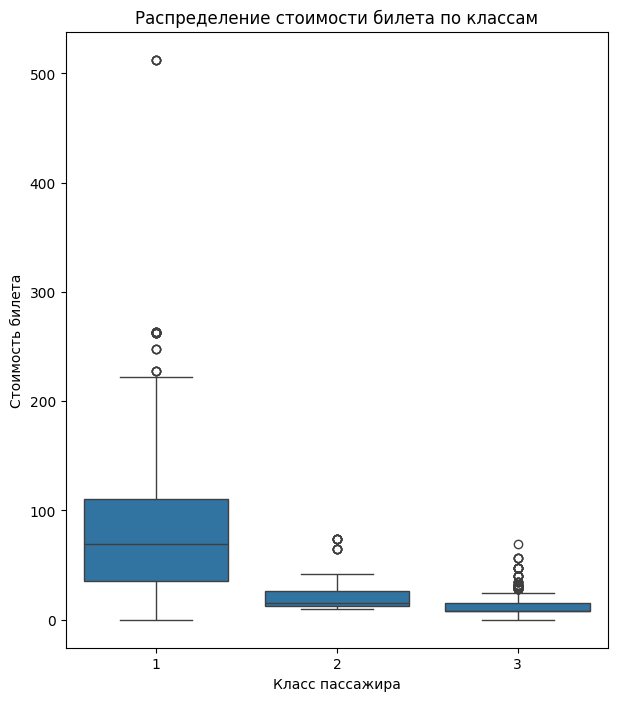

In [32]:
import seaborn as sns

plt.figure(figsize=(7, 8))

sns.boxplot(
    data=data_cleaned,
    x="Pclass",
    y="Fare"
)

plt.title("Распределение стоимости билета по классам")
plt.xlabel("Класс пассажира")
plt.ylabel("Стоимость билета")

plt.show()

### Sunburst chart

График представляет собой солнечную диаграмму, отображающую распределение пассажиров по классу, полу и выживаемости. Он показывает, как пассажиры разделяются на группы по этим категориям и как они связаны между собой.

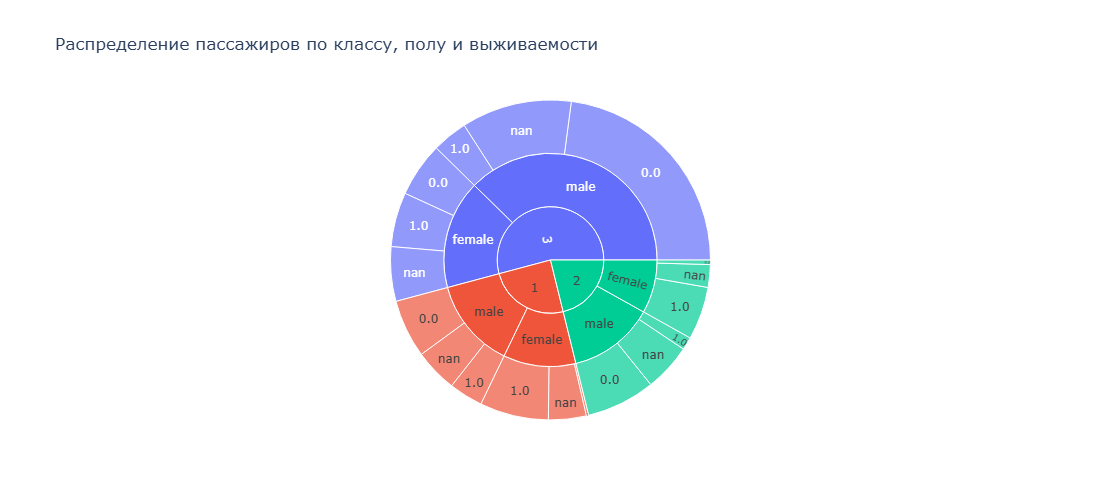

In [33]:
data_cleaned = data.copy()

data_cleaned["Pclass"] = data_cleaned["Pclass"].astype(str)
data_cleaned["Sex"] = data_cleaned["Sex"].astype(str)
data_cleaned["Survived"] = data_cleaned["Survived"].astype(str)

data_cleaned = data_cleaned.dropna(subset=["Pclass", "Sex", "Survived"])

fig = px.sunburst(
    data_cleaned, 
    path=["Pclass", "Sex", "Survived"],  
    title="Распределение пассажиров по классу, полу и выживаемости",
    labels={"Pclass": "Класс", "Sex": "Пол", "Survived": "Выживаемость"},
    width=900,  
    height=500
)

fig.show()

### Тепловая карта (Heatmap)

График показывает, как распределяются пассажиры по классам и возрастным группам, что поможет выявить, какой возраст преобладает в определенных классах.

C:\Users\Mi\AppData\Local\Temp\ipykernel_9888\274911574.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



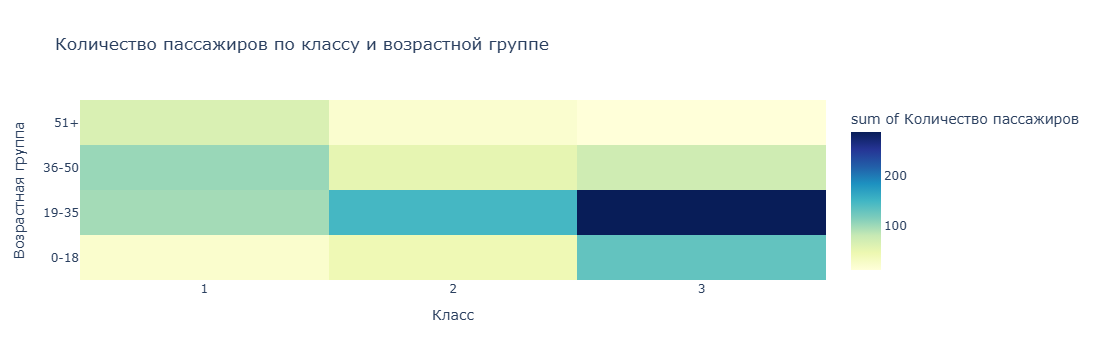

In [34]:
data_cleaned = data.copy()

data_cleaned["Pclass"] = data_cleaned["Pclass"].astype(str)
data_cleaned = data_cleaned.dropna(subset=["Pclass", "Age"])

age_bins = [0, 18, 35, 50, 90]  
age_labels = ["0-18", "19-35", "36-50", "51+"]  
data_cleaned["AgeGroup"] = pd.cut(data_cleaned["Age"], bins=age_bins, labels=age_labels)

heatmap_data = data_cleaned.groupby(["Pclass", "AgeGroup"]).size().reset_index(name="Count")

fig = px.density_heatmap(
    heatmap_data, 
    x="Pclass", 
    y="AgeGroup", 
    z="Count",  
    title="Количество пассажиров по классу и возрастной группе",
    labels={"Pclass": "Класс", "AgeGroup": "Возрастная группа", "Count": "Количество пассажиров"},
    color_continuous_scale="YlGnBu"  
)

fig.show()

### 3D Точечная диаграмма (3D Scatter plot) 

График отображает зависимость между возрастом пассажиров, стоимостью билета и первой буквой фамилии. Цвет точек обозначает наличие каюты.

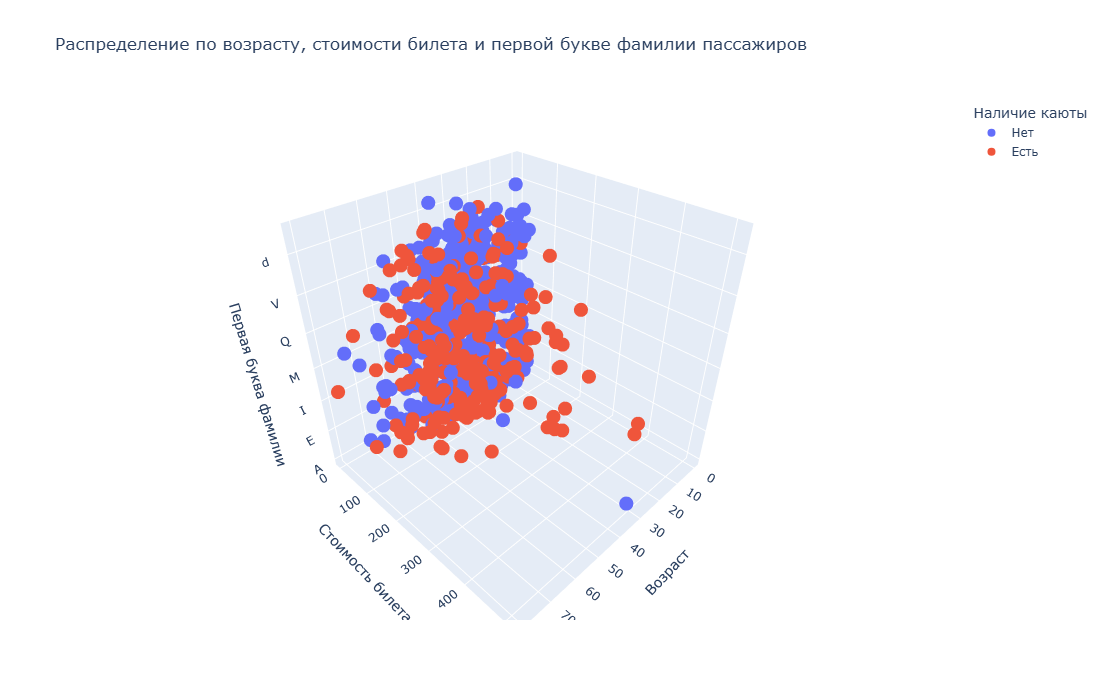

In [35]:
data_cleaned = data.copy()

data_cleaned["NameFirstLetter"] = data_cleaned["Name"].apply(lambda x: x.split(",")[0][0] if pd.notnull(x) else "Unknown")
data_cleaned["HasCabin"] = data_cleaned["Cabin"].apply(lambda x: "Есть" if pd.notnull(x) else "Нет")

data_cleaned["NameFirstLetter"] = sorted(data_cleaned["NameFirstLetter"])

fig = px.scatter_3d(
    data_cleaned,
    x="Age",               
    y="Fare",              
    z="NameFirstLetter",   
    color="HasCabin",            
    labels={"Age": "Возраст", "Fare": "Стоимость билета", "NameFirstLetter": "Первая буква фамилии", "HasCabin": "Наличие каюты"},
    title="Распределение по возрасту, стоимости билета и первой букве фамилии пассажиров",
    width=900,
    height=700
)

fig.show()

### Sankey Diagram

Этот график показывает, как пассажиры Титаника распределяются по трем характеристикам: классу, порту посадки и выживаемости. На этом графике мы можем увидеть, сколько пассажиров каждого класса сели в каждом порту, а также, как они распределились по выжившим и невыжившим. Здесь узлы — это классы, порты и статус выживаемости, а связи показывают потоки пассажиров от одного этапа к другому. На графике видно, что чем шире линия между узлами, тем больше пассажиров в этой группе. 

C:\Users\Mi\AppData\Local\Temp\ipykernel_9888\3408026389.py:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



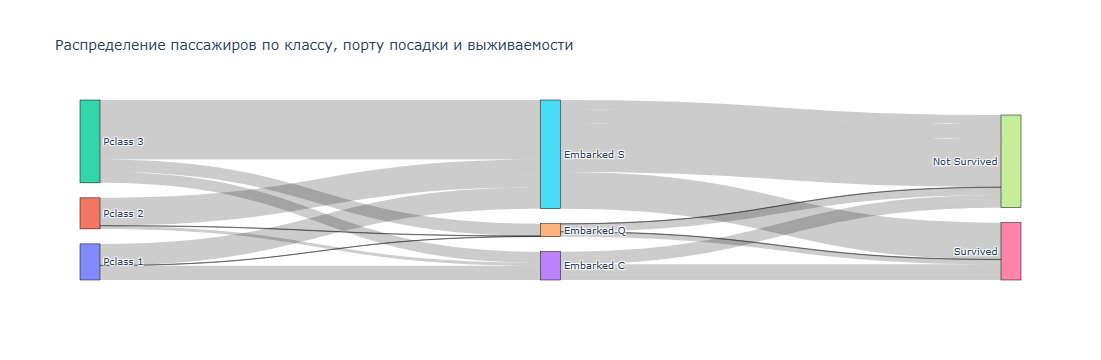

In [36]:
import plotly.graph_objects as go

data_cleaned = data.copy()
data_cleaned = data_cleaned.dropna(subset=["Pclass", "Embarked", "Survived"])

categories = [
    'Pclass 1', 'Pclass 2', 'Pclass 3',  
    'Embarked C', 'Embarked Q', 'Embarked S',  
    'Survived', 'Not Survived' 
]

sankey_data = data_cleaned.groupby(['Pclass', 'Embarked', 'Survived']).size().reset_index(name='Count')

sources = []
targets = []
values = []

for index, row in sankey_data.iterrows():
    pclass_index = categories.index(f"Pclass {row['Pclass']}")
    embarked_index = categories.index(f"Embarked {row['Embarked']}")
    
    sources.append(pclass_index)
    targets.append(embarked_index)
    values.append(row['Count'])
    
    survived_index = categories.index('Survived' if row['Survived'] == 1 else 'Not Survived')
    
    sources.append(embarked_index)
    targets.append(survived_index)
    values.append(row['Count'])

fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=categories
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    )
))

fig.update_layout(title_text="Распределение пассажиров по классу, порту посадки и выживаемости", font_size=10)

fig.show()